In [99]:
#Import necessary libraries

import pandas as pd
import math
import scipy as sp
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mpdt

In [2]:
data_january = pd.read_csv('Downloads/fhv_tripdata_2017-01.csv')

/home/guido/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_february = pd.read_csv('Downloads/fhv_tripdata_2017-02.csv')

In [4]:
data_january = data_january.drop(['DropOff_datetime'],axis=1)

In [5]:
data_january = data_january.drop(['PUlocationID'],axis=1)

In [6]:
data_january = data_january.drop(['DOlocationID'],axis=1)

In [7]:
data_february = data_february.drop(['DropOff_datetime'],axis=1)
data_february = data_february.drop(['PUlocationID'],axis=1)
data_february = data_february.drop(['DOlocationID'],axis=1)

In [8]:
joint_data = data_january.append(data_february)

In [9]:
joint_data['Dispatching_base_num'] = joint_data['Dispatching_base_num'].apply(lambda x: str.upper(str(x)))

In [10]:
company_codes = pd.read_csv('ride_sharing_codes.csv')

In [11]:
uber_lyft_data = joint_data[joint_data['Dispatching_base_num'].isin(company_codes['Code'])==True]

In [12]:
uber_lyft_data['company'] = uber_lyft_data['Dispatching_base_num'].apply(lambda x: 'lyft' if x== 'B02844' or x == 'B02510' else 'uber')

/home/guido/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
uber_data = uber_lyft_data[uber_lyft_data['company']=='uber']

In [56]:
lyft_data = uber_lyft_data[uber_lyft_data['company']=='lyft']

In [72]:
uber_counts = uber_data['date'].value_counts().sort_index()

In [73]:
uber_counts = pd.DataFrame(uber_counts)

In [81]:
uber_counts.columns = ['uber']

In [78]:
lyft_counts = lyft_data['date'].value_counts().sort_index()

In [79]:
lyft_counts = pd.DataFrame(lyft_counts)

In [82]:
lyft_counts.columns = ['lyft']

In [83]:
total_rides_per_day = pd.DataFrame()
total_rides_per_day['uber'] = uber_counts['uber']
total_rides_per_day['lyft'] = lyft_counts['lyft']

In [86]:
total_rides_per_day['share_uber'] = total_rides_per_day['uber']/(total_rides_per_day['uber']+total_rides_per_day['lyft'])

In [87]:
total_rides_per_day['share_lyft'] = total_rides_per_day['lyft']/(total_rides_per_day['uber']+total_rides_per_day['lyft'])

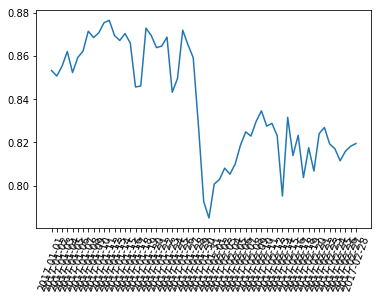

In [96]:
plt.xticks(rotation=70)
plt.plot(total_rides_per_day.index.values, total_rides_per_day['share_uber'])

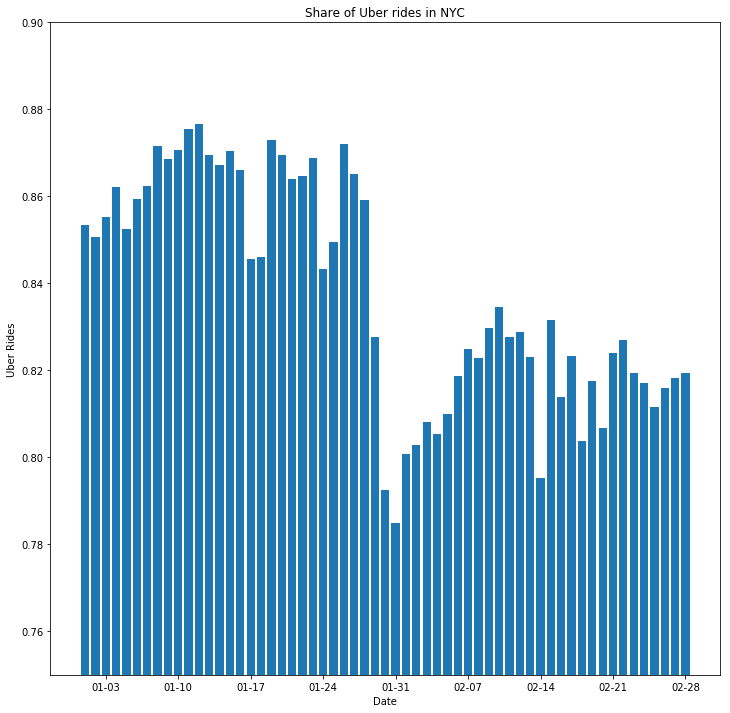

In [106]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(matplotlib.dates.datestr2num(total_rides_per_day.index), total_rides_per_day['share_uber'])
ax.xaxis_date()
ax.set_ylim([.75,.90])
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Uber Rides",
       title="Share of Uber rides in NYC")

# Define the date format
date_form = mpdt.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [101]:
total_rides_per_day.index

Index([u'2017-01-01', u'2017-01-02', u'2017-01-03', u'2017-01-04',
       u'2017-01-05', u'2017-01-06', u'2017-01-07', u'2017-01-08',
       u'2017-01-09', u'2017-01-10', u'2017-01-11', u'2017-01-12',
       u'2017-01-13', u'2017-01-14', u'2017-01-15', u'2017-01-16',
       u'2017-01-17', u'2017-01-18', u'2017-01-19', u'2017-01-20',
       u'2017-01-21', u'2017-01-22', u'2017-01-23', u'2017-01-24',
       u'2017-01-25', u'2017-01-26', u'2017-01-27', u'2017-01-28',
       u'2017-01-29', u'2017-01-30', u'2017-01-31', u'2017-02-01',
       u'2017-02-02', u'2017-02-03', u'2017-02-04', u'2017-02-05',
       u'2017-02-06', u'2017-02-07', u'2017-02-08', u'2017-02-09',
       u'2017-02-10', u'2017-02-11', u'2017-02-12', u'2017-02-13',
       u'2017-02-14', u'2017-02-15', u'2017-02-16', u'2017-02-17',
       u'2017-02-18', u'2017-02-19', u'2017-02-20', u'2017-02-21',
       u'2017-02-22', u'2017-02-23', u'2017-02-24', u'2017-02-25',
       u'2017-02-26', u'2017-02-27', u'2017-02-28'],
      dty